## Exploring Greening Laneways and Urban Forest Strategy
**Authored by:** Sabih Ul Hassan

**Duration:** 90 mins  
**Level:** Intermediate  
**Pre-requisite Skills:** Python, Data Analysis, Geospatial Analysis, Clustering

### Scenario

I am tasked with optimizing the greening potential of laneways in conjunction with the Urban Forest Strategy. The goal is to ensure that both laneways and streets benefit from strategic planting to enhance urban sustainability, mitigate the urban heat island effect, and improve biodiversity.

### What this use case will teach you

At the end of this use case you will:
- Understand how to clean and preprocess urban greening datasets.
- Perform exploratory data analysis (EDA) to extract key insights.
- Apply clustering techniques to identify high-potential greening areas.
- Conduct spatial analysis to visualize the distribution of greening efforts.
- Develop strategic recommendations for optimizing urban greening efforts.
- Create an implementation framework to execute the recommendations.

### Background and Introduction

Urban greening is an essential component of sustainable city planning. The City of Melbourne aims to enhance its Urban Forest Strategy by integrating the greening potential of laneways. By strategically planting trees and greenery in laneways, the city can mitigate the urban heat island effect, improve air quality, and enhance biodiversity. This use case explores the overlap and correlation between the greening potential of laneways and the Urban Forest Strategy, providing actionable insights and recommendations to optimize urban greening efforts.

### Datasets Used

1. **Laneways with Greening Potential:** Contains information on the insolation score, vertical surface area, forest cover, and bins percentage for various laneways in Melbourne.
2. **Tree Planting Zone Schedules with Years:** Details the planting schedules, including the segment IDs and descriptions of the tree planting zones.

These datasets are sourced from the City of Melbourne's open data portal.

### Implementation

**Step 1: Data Cleaning and Preprocessing**
- Load and inspect the datasets.
- Clean and preprocess the data to handle missing values and ensure consistency.

**Step 2: Exploratory Data Analysis (EDA)**
- Generate summary statistics for key metrics.
- Conduct spatial analysis to map the distribution of forest areas.
- Identify outliers to understand anomalies.

**Step 3: Clustering Analysis**
- Apply K-means clustering to identify high-potential greening areas.
- Visualize clusters to understand their characteristics.

**Step 4: Strategic Planning**
- Develop data-driven short-term and long-term greening strategies.
- Incorporate community input and feasibility studies.

**Step 5: Implementation Framework**
- Create a phased implementation plan with clear milestones and metrics for success.
- Integrate monitoring and evaluation mechanisms to assess the impact of greening efforts.

### Conclusion

By following this use case, you will gain a comprehensive understanding of how to leverage data analysis and geospatial techniques to enhance urban greening efforts. The actionable insights and recommendations derived from this analysis will aid in optimizing the City of Melbourne's Urban Forest Strategy, contributing to a more sustainable and livable city.


In [1]:
!pip install folium
!pip install geopandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
import os
os.environ['OMP_NUM_THREADS'] = '1'
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import folium
from folium.plugins import MarkerCluster
import geopandas as gpd
from shapely.geometry import Point
import requests
from io import StringIO

## Importing Datasets
Use this if importing with API, comment this out if importing downloaded datasets

In [2]:
def API_Unlimited(datasetname): # pass in dataset name and api key
    dataset_id = datasetname

    base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
    #apikey = api_key
    dataset_id = dataset_id
    format = 'csv'

    url = f'{base_url}{dataset_id}/exports/{format}'
    params = {
        'select': '*',
        'limit': -1,  # all records
        'lang': 'en',
        'timezone': 'UTC'
    }

    # GET request
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # StringIO to read the CSV data
        url_content = response.content.decode('utf-8')
        datasetname = pd.read_csv(StringIO(url_content), delimiter=';')
        print(datasetname.sample(10, random_state=999)) # Test
        return datasetname 
    else:
        return (print(f'Request failed with status code {response.status_code}'))




In [3]:
download_link_1 = 'laneways-with-greening-potential'
download_link_2 = 'tree-planting-zone-schedules-with-years-urban-forest'


# Use functions to download and load data
laneway_df = API_Unlimited(download_link_1)
urban_forest_df = API_Unlimited(download_link_2)


                                geo_point_2d  \
91      -37.81388085097895, 144.970002281767   
237    -37.81124523135607, 144.9629516862615   
7    -37.815866684899426, 144.97038374615923   
168     -37.8124734926234, 144.9713761243581   
166   -37.81111151578862, 144.97244046374837   
186    -37.8172843757446, 144.96517912329656   
70   -37.812892966824165, 144.97243830492508   
34    -37.81195697118721, 144.95842907268548   
130   -37.81705022724468, 144.96401604954465   
45    -37.814139526354815, 144.9614681922904   

                                             geo_shape  segid_1  mapbase_mc  \
91   {"coordinates": [[[[144.97014063630604, -37.81...    20259     20259.0   
237  {"coordinates": [[[[144.96284461566734, -37.81...    30120     30120.0   
7    {"coordinates": [[[[144.97021260693592, -37.81...    20251     20251.0   
168  {"coordinates": [[[[144.97147118320112, -37.81...    20238     20238.0   
166  {"coordinates": [[[[144.97272840399364, -37.81...    20230     20230.0 

## Data Preparation and Loading

This cell loads the laneway and urban forest strategy datasets into pandas DataFrames and displays the first few rows of each dataset. This helps us understand the structure and content of the data.

In [4]:


# Load the laneway dataset
#laneway_df = pd.read_csv('laneways-with-greening-potential.csv')

# Load the Urban Forest Strategy dataset
#urban_forest_df = pd.read_csv('tree-planting-zone-schedules-with-years-urban-forest.csv')

# Display the first few rows of each dataset
print("Laneway Dataset:")
print(laneway_df.head())

print("\nUrban Forest Strategy Dataset:")
print(urban_forest_df.head())


Laneway Dataset:
                              geo_point_2d  \
0   -37.81535672343349, 144.95569265063773   
1   -37.81037958674067, 144.97089952599487   
2  -37.810217121848865, 144.97162762401734   
3   -37.81077581774339, 144.97188375120993   
4  -37.811226042417026, 144.97139352262127   

                                           geo_shape  segid_1  mapbase_mc  \
0  {"coordinates": [[[[144.9556606568115, -37.815...    20061         0.0   
1  {"coordinates": [[[[144.9708657242154, -37.810...    20226     20226.0   
2  {"coordinates": [[[[144.9717580200683, -37.810...    20227     20227.0   
3  {"coordinates": [[[[144.97184322645086, -37.81...    20228     20228.0   
4  {"coordinates": [[[[144.9716104991305, -37.811...    20231     20231.0   

   insol_scor  verticalsu  segid  driveways   parklane  objectid  ...  \
0    4.056745   66.713100  20061          0  63.516600         0  ...   
1    3.110616   48.868240  20226  5 or more   0.000000         2  ...   
2    2.269407   57.56435

## Basic Information and Summary Statistics

This cell provides basic information and summary statistics for both datasets. It includes data types, non-null counts, and descriptive statistics like mean, standard deviation, and percentiles. Additionally, it checks for missing values in both datasets.

In [5]:
# Display basic information about the laneway dataset
print("Laneway Dataset Info:")
print(laneway_df.info())
print("\nLaneway Dataset Summary Statistics:")
print(laneway_df.describe())

# Display basic information about the urban forest strategy dataset
print("\nUrban Forest Strategy Dataset Info:")
print(urban_forest_df.info())
print("\nUrban Forest Strategy Dataset Summary Statistics:")
print(urban_forest_df.describe())

# Check for missing values in both datasets
print("\nMissing values in Laneway Dataset:")
print(laneway_df.isnull().sum())

print("\nMissing values in Urban Forest Strategy Dataset:")
print(urban_forest_df.isnull().sum())



Laneway Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   geo_point_2d  246 non-null    object 
 1   geo_shape     246 non-null    object 
 2   segid_1       246 non-null    int64  
 3   mapbase_mc    246 non-null    float64
 4   insol_scor    246 non-null    float64
 5   verticalsu    246 non-null    float64
 6   segid         246 non-null    int64  
 7   driveways     246 non-null    object 
 8   parklane      246 non-null    float64
 9   objectid      246 non-null    int64  
 10  climate_ty    246 non-null    object 
 11  narrowing     246 non-null    object 
 12  closepart     246 non-null    object 
 13  farmlane      246 non-null    float64
 14  walls         246 non-null    object 
 15  farm_rank     246 non-null    object 
 16  vert_rank     246 non-null    object 
 17  fores_rank    246 non-null    object 
 18  forest  

## Data Cleaning
**Description:**
This cell performs data cleaning by removing duplicate rows, handling missing values, and ensuring consistent data types. It drops irrelevant columns with all missing values from the urban forest dataset and rows with missing values in the `mapbase__1` column from the laneway dataset. Missing values in numeric columns are filled with the median.

**Output Analysis:**
- **Laneway Dataset:** Retained 243 entries after dropping rows with missing values in the `mapbase__1` column. Numeric columns have missing values filled with the median.
- **Urban Forest Strategy Dataset:** Retained 839 entries after dropping irrelevant columns with all missing values. Numeric columns have missing values filled with the median.


In [6]:
# Cell 3: Enhanced Data Cleaning

# Remove duplicate rows
laneway_df_cleaned = laneway_df.drop_duplicates()
urban_forest_df_cleaned = urban_forest_df.drop_duplicates()

# Check if specific columns to be dropped exist before dropping them
columns_to_drop = ['str_from', 'segpart', 'statusid', 'streetname', 'streetid', 'mapstatus', 'str_to']
urban_forest_df_cleaned = urban_forest_df_cleaned.drop(columns=[col for col in columns_to_drop if col in urban_forest_df_cleaned.columns])

# Drop rows with missing values in the 'mapbase_1' column of the laneway dataset
if 'mapbase_1' in laneway_df_cleaned.columns:
    laneway_df_cleaned = laneway_df_cleaned.dropna(subset=['mapbase_1'])

# Fill missing values in numeric columns with the median
laneway_numeric_cols = laneway_df_cleaned.select_dtypes(include=['float64', 'int64']).columns
urban_forest_numeric_cols = urban_forest_df_cleaned.select_dtypes(include=['float64', 'int64']).columns

laneway_df_cleaned[laneway_numeric_cols] = laneway_df_cleaned[laneway_numeric_cols].fillna(laneway_df_cleaned[laneway_numeric_cols].median())
urban_forest_df_cleaned[urban_forest_numeric_cols] = urban_forest_df_cleaned[urban_forest_numeric_cols].fillna(urban_forest_df_cleaned[urban_forest_numeric_cols].median())

# Normalize 'geo_point' column name for consistency
if 'geo_point_2d' in laneway_df_cleaned.columns:
    laneway_df_cleaned.rename(columns={'geo_point_2d': 'geo_point'}, inplace=True)
if 'geo_point_2d' in urban_forest_df_cleaned.columns:
    urban_forest_df_cleaned.rename(columns={'geo_point_2d': 'geo_point'}, inplace=True)

# Ensure consistent data types (example: converting Geo Point columns to string)
if 'geo_point' in laneway_df_cleaned.columns:
    laneway_df_cleaned['geo_point'] = laneway_df_cleaned['geo_point'].astype(str)
if 'geo_point' in urban_forest_df_cleaned.columns:
    urban_forest_df_cleaned['geo_point'] = urban_forest_df_cleaned['geo_point'].astype(str)

# Standardize column names to lower case and replace spaces with underscores for consistency
laneway_df_cleaned.columns = [col.lower().replace(' ', '_') for col in laneway_df_cleaned.columns]
urban_forest_df_cleaned.columns = [col.lower().replace(' ', '_') for col in urban_forest_df_cleaned.columns]

# Display basic information about the cleaned datasets to verify changes
print("Cleaned Laneway Dataset Info:")
print(laneway_df_cleaned.info())

print("\nCleaned Urban Forest Strategy Dataset Info:")
print(urban_forest_df_cleaned.info())


Cleaned Laneway Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 245
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   geo_point   243 non-null    object 
 1   geo_shape   243 non-null    object 
 2   segid_1     243 non-null    int64  
 3   mapbase_mc  243 non-null    float64
 4   insol_scor  243 non-null    float64
 5   verticalsu  243 non-null    float64
 6   segid       243 non-null    int64  
 7   driveways   243 non-null    object 
 8   parklane    243 non-null    float64
 9   objectid    243 non-null    int64  
 10  climate_ty  243 non-null    object 
 11  narrowing   243 non-null    object 
 12  closepart   243 non-null    object 
 13  farmlane    243 non-null    float64
 14  walls       243 non-null    object 
 15  farm_rank   243 non-null    object 
 16  vert_rank   243 non-null    object 
 17  fores_rank  243 non-null    object 
 18  forest      243 non-null    float64
 19  park

## Summary Statistics and Visualization


Summary Statistics for Laneway Dataset:
                                     geo_point  \
count                                      243   
unique                                     243   
top     -37.81535672343349, 144.95569265063773   
freq                                         1   
mean                                       NaN   
std                                        NaN   
min                                        NaN   
25%                                        NaN   
50%                                        NaN   
75%                                        NaN   
max                                        NaN   

                                                geo_shape       segid_1  \
count                                                 243    243.000000   
unique                                                243           NaN   
top     {"coordinates": [[[[144.9556606568115, -37.815...           NaN   
freq                                                    1  

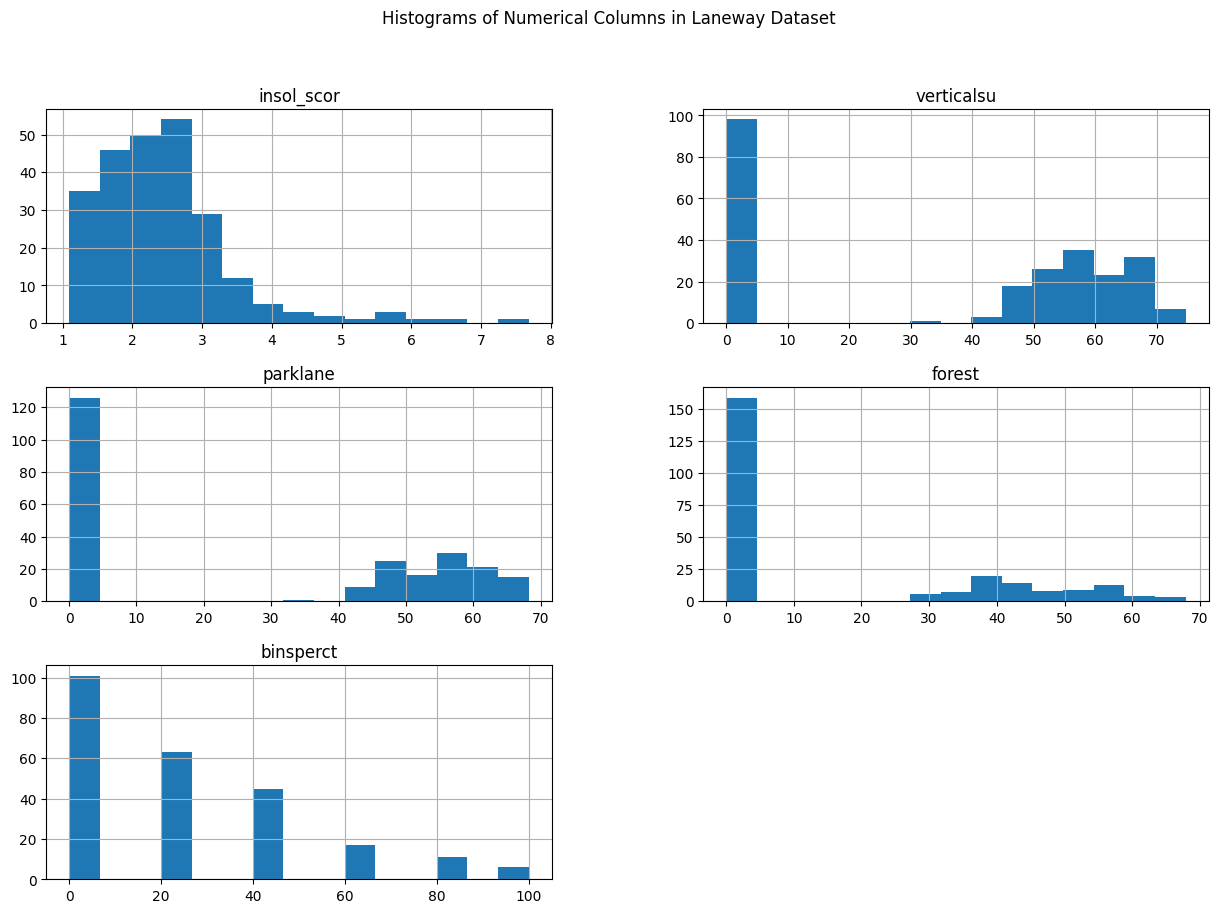

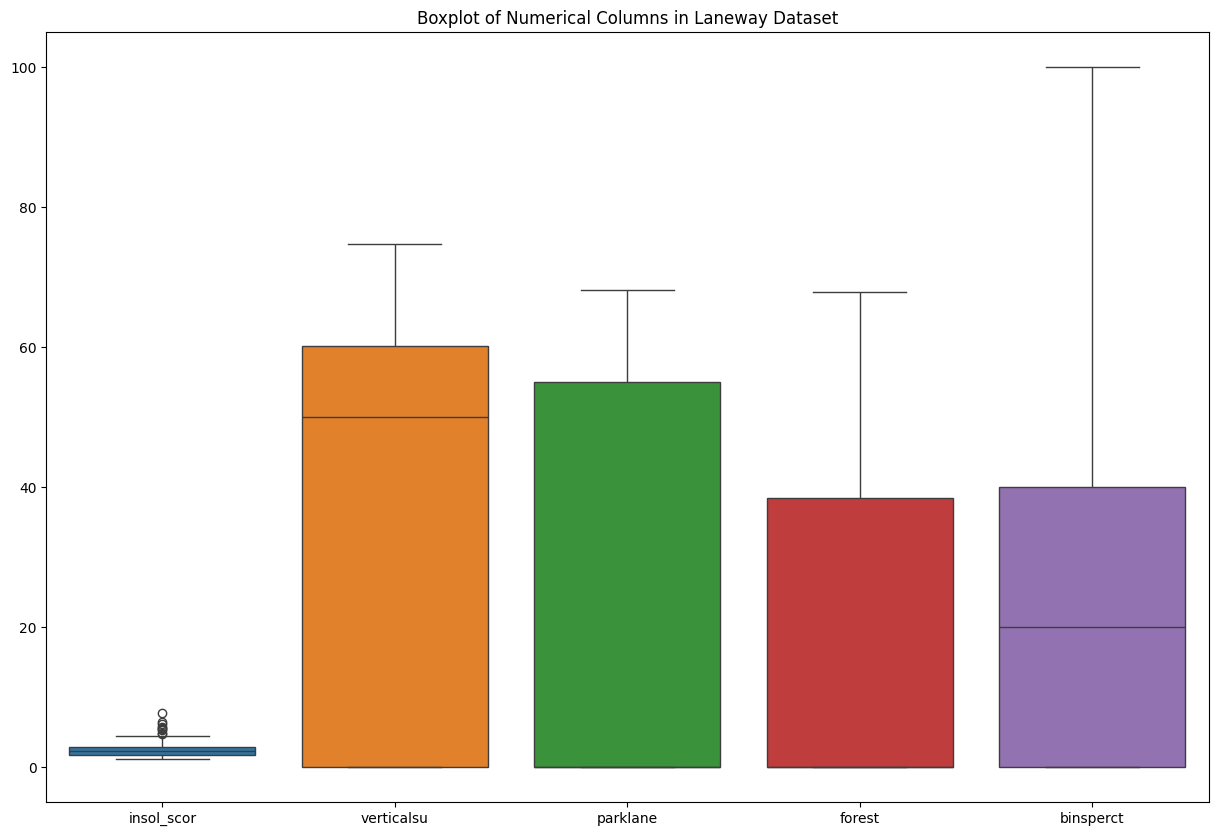

In [7]:
# Cell 4: Summary Statistics and Visualizations



# Summary statistics for the cleaned datasets
print("Summary Statistics for Laneway Dataset:")
print(laneway_df_cleaned.describe(include='all'))

print("\nSummary Statistics for Urban Forest Strategy Dataset:")
print(urban_forest_df_cleaned.describe(include='all'))

# Visualize the distribution of key numerical columns in the laneway dataset
numerical_columns_laneway = ['insol_scor', 'verticalsu', 'parklane', 'forest', 'binsperct']

# Histograms for numerical columns
laneway_df_cleaned[numerical_columns_laneway].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Columns in Laneway Dataset')
plt.show()

# Box plots for numerical columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=laneway_df_cleaned[numerical_columns_laneway])
plt.title('Boxplot of Numerical Columns in Laneway Dataset')
plt.show()



**Description:**
This cell provides a comprehensive overview of the cleaned datasets by generating detailed descriptive statistics and visualizing the distribution of key numerical variables. 

1. **Descriptive Statistics:**
   - **Purpose:** To understand the central tendency, dispersion, and overall distribution of the data in both datasets.
   - **Output:** 
     - For the laneway dataset, it provides counts, means, standard deviations, minimum and maximum values, and percentiles for each column. This helps identify the range, spread, and any potential anomalies or outliers.
     - For the urban forest strategy dataset, it provides similar statistics, highlighting the distribution of schedule and segment descriptions.

2. **Histograms:**
   - **Purpose:** To visualize the distribution of key numerical columns in the laneway dataset.
   - **Columns Visualized:** `insol_scor` (insolation score), `verticalsu` (vertical surface area), `parklane` (park area in laneways), `forest` (forest area), and `binsperct` (percentage of bins or waste containers).
   - **Output:** 
     - Histograms display the frequency distribution of these variables. For example, a right-skewed histogram for `insol_scor` indicates most laneways have lower insolation scores.
     - The spread of values in `verticalsu` shows many laneways with low vertical surface areas.
     - The histogram for `parklane` reveals that many laneways have zero park area, indicating not all laneways are used for parking.

3. **Box Plots:**
   - **Purpose:** To visualize the spread and identify potential outliers in key numerical columns.
   - **Columns Visualized:** Same as in the histograms (`insol_scor`, `verticalsu`, `parklane`, `forest`, and `binsperct`).
   - **Output:** 
     - Box plots provide a five-number summary (minimum, first quartile, median, third quartile, and maximum) and highlight any outliers. 
     - They show the variability and distribution of the data, such as the median value for `insol_scor` and the presence of any extreme values in `verticalsu`.

**Output Analysis:**
- **Descriptive Statistics:** Detailed statistical summary for both datasets, offering insights into the data's structure and variability.
- **Histograms:** Visual distribution of numerical variables, indicating data spread and skewness.
- **Box Plots:** Visualization of data spread, identifying potential outliers and understanding data distribution.

These visualizations and statistics provide a solid foundation for further analysis by offering a clear picture of the data's characteristics.


## Geospatial Distribution Visualization

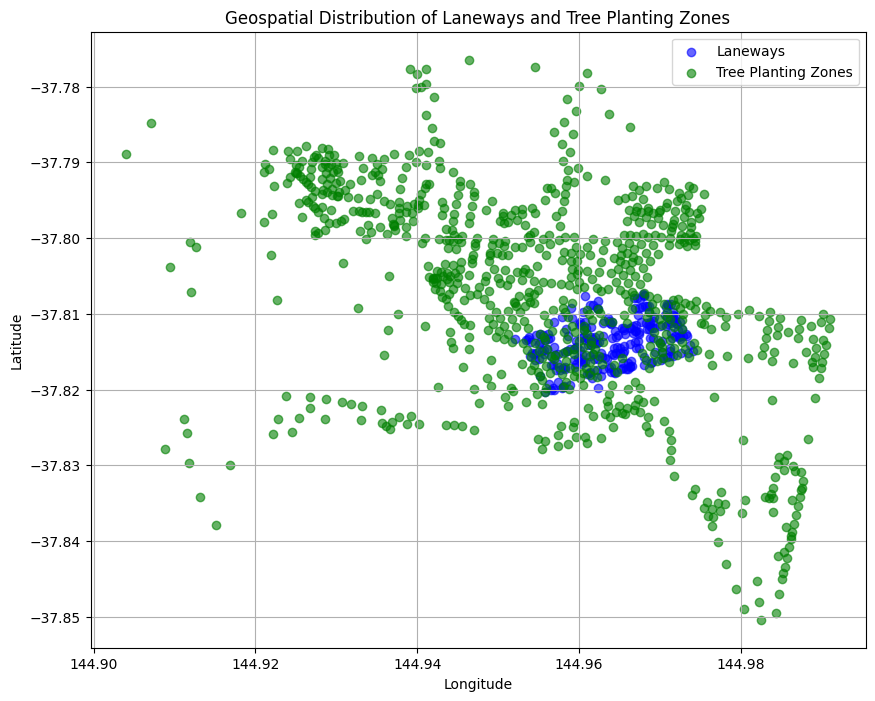

In [8]:


# Extract latitude and longitude from Geo Point for both datasets
laneway_coords = laneway_df_cleaned['geo_point'].str.split(', ', expand=True).astype(float)
forest_coords = urban_forest_df_cleaned['geo_point'].str.split(', ', expand=True).astype(float)

# Plot the geographical distribution of laneways and tree planting zones
plt.figure(figsize=(10, 8))
plt.scatter(laneway_coords[1], laneway_coords[0], c='blue', label='Laneways', alpha=0.6)
plt.scatter(forest_coords[1], forest_coords[0], c='green', label='Tree Planting Zones', alpha=0.6)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geospatial Distribution of Laneways and Tree Planting Zones')
plt.legend()
plt.grid(True)
plt.show()


**Description:**
This cell visualizes the geographical distribution of laneways with greening potential and planned tree planting zones using scatter plots. It highlights spatial overlaps and potential integration points for urban greening efforts.

1. **Geospatial Data Preparation:**
   - **Laneways:** Extract geographical coordinates from the `Geo Point` column in the laneway dataset and convert them into latitude and longitude for plotting.
   - **Tree Planting Zones:** Extract geographical coordinates from the `Geo Point` column in the urban forest strategy dataset and convert them into latitude and longitude for plotting.

2. **Scatter Plot Visualization:**
   - **Purpose:** To visualize the spatial distribution of laneways and tree planting zones and identify areas of overlap or potential integration.
   - **Plot Details:**
     - **Laneways (Blue Points):** Represented by blue points on the scatter plot, showing areas with high potential for greening initiatives.
     - **Tree Planting Zones (Green Points):** Represented by green points, indicating existing or planned urban forestry efforts.
     - **Overlap Areas:** Indicated by the proximity or overlap of blue and green points, suggesting potential areas for coordinated greening efforts.

**Output Analysis:**
- **Laneways Distribution:** The blue points are concentrated in specific urban areas, suggesting high potential zones for greening initiatives.
- **Tree Planting Zones Distribution:** The green points are more spread out across the city, showing current or planned urban forestry efforts.
- **Overlap Areas:** Regions where blue and green points overlap indicate potential integration points for enhancing urban greening by aligning laneway greening efforts with the Urban Forest Strategy.

The enhanced geospatial distribution visualization provides a spatial context for understanding the distribution and potential overlap between laneways with greening potential and designated tree planting zones. This helps in identifying strategic areas for urban greening interventions.


In [9]:


# Extracting coordinates for laneways and tree planting zones
laneway_coords = laneway_df_cleaned['geo_point'].str.split(', ', expand=True).astype(float)
forest_coords = urban_forest_df_cleaned['geo_point'].str.split(', ', expand=True).astype(float)

# Create a base map
m = folium.Map(location=[-37.81, 144.96], zoom_start=13)

# Add laneway markers
laneway_cluster = MarkerCluster(name='Laneways').add_to(m)
for lat, lon in zip(laneway_coords[0], laneway_coords[1]):
    folium.Marker(location=[lat, lon], icon=folium.Icon(color='blue', icon='info-sign')).add_to(laneway_cluster)

# Add tree planting zone markers
forest_cluster = MarkerCluster(name='Tree Planting Zones').add_to(m)
for lat, lon in zip(forest_coords[0], forest_coords[1]):
    folium.Marker(location=[lat, lon], icon=folium.Icon(color='green', icon='tree-conifer')).add_to(forest_cluster)

# Add layer control
folium.LayerControl().add_to(m)

# Save the map as an HTML file
m.save('/mnt/data/laneway_forest_map.html')

# Display the map
m


**Enhanced Geospatial Analysis with Folium**

**Description:**
This cell extends the geospatial analysis by using Folium to create an interactive map. The map visualizes the geographical distribution of laneways with greening potential and planned tree planting zones, allowing for more detailed exploration of spatial relationships.

1. **Extract Coordinates:**
   - Extract latitude and longitude coordinates from the `Geo Point` column for both laneways and tree planting zones.

2. **Create a Base Map:**
   - Initialize a Folium map centered on Melbourne with a specified zoom level.

3. **Add Laneway Markers:**
   - Use the `MarkerCluster` plugin to group and add markers for laneways on the map.

4. **Add Tree Planting Zone Markers:**
   - Similarly, use the `MarkerCluster` plugin to group and add markers for tree planting zones on the map.

5. **Add Layer Control:**
   - Add layer control to the map to toggle the visibility of laneway and tree planting zone markers.

6. **Save and Display the Map:**
   - Save the map as an HTML file and display it.

**Output Analysis:**
- The interactive map allows users to explore the spatial distribution of laneways and tree planting zones in detail.
- Marker clusters provide a clear visualization of concentration areas, aiding in identifying potential integration points for urban greening efforts.

This enhanced geospatial analysis offers a powerful tool for visualizing and understanding the spatial relationships between laneways and tree planting zones.


## Integration and Correlation Analysis

Merge the datasets on the segid column.
Perform a correlation analysis on the merged dataset.



Correlation Matrix:
             segid_1  mapbase_mc  insol_scor  verticalsu     segid  parklane  \
segid_1     1.000000    1.000000    0.582311    0.095242  1.000000 -0.262810   
mapbase_mc  1.000000    1.000000    0.582311    0.095242  1.000000 -0.262810   
insol_scor  0.582311    0.582311    1.000000    0.312872  0.582311 -0.270814   
verticalsu  0.095242    0.095242    0.312872    1.000000  0.095242 -0.070148   
segid       1.000000    1.000000    0.582311    0.095242  1.000000 -0.262810   
parklane   -0.262810   -0.262810   -0.270814   -0.070148 -0.262810  1.000000   
objectid    0.538842    0.538842    0.266999   -0.198183  0.538842 -0.052781   
farmlane         NaN         NaN         NaN         NaN       NaN       NaN   
forest      0.350895    0.350895    0.197579    0.027982  0.350895 -0.870071   
binsperct  -0.299869   -0.299869    0.091304    0.215322 -0.299869 -0.474605   

            objectid  farmlane    forest  binsperct  
segid_1     0.538842       NaN  0.350895  -0

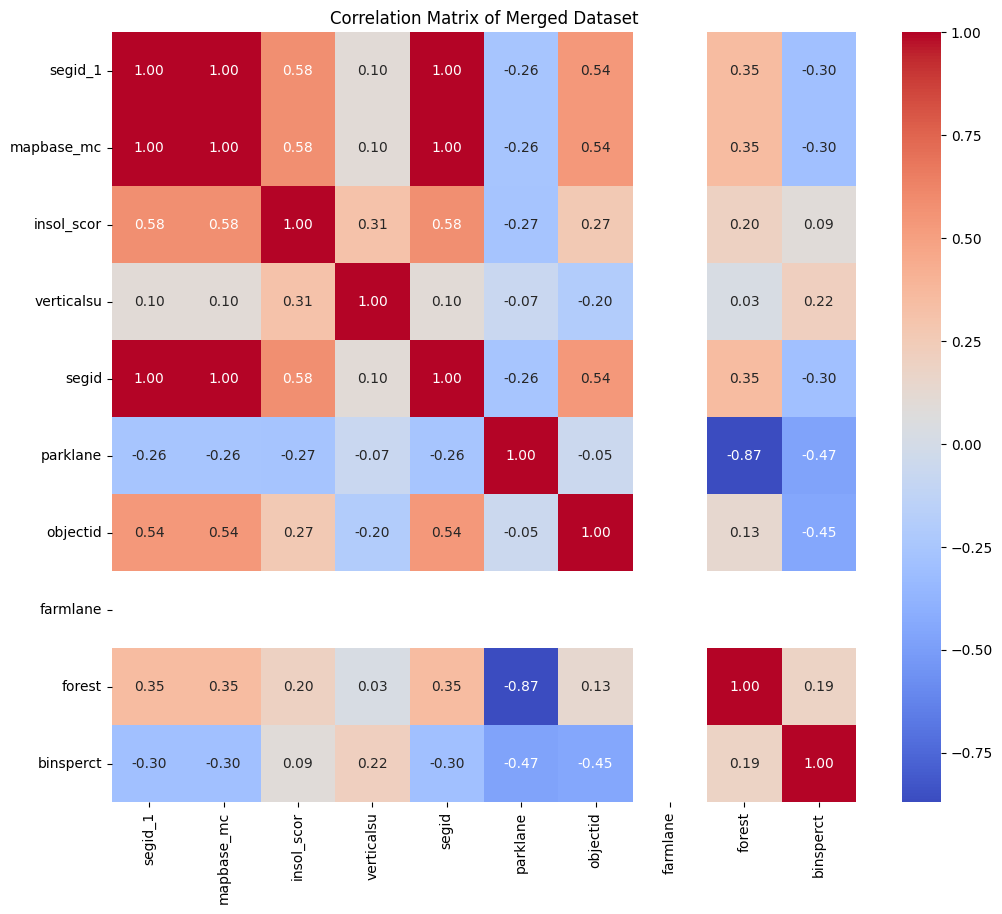

In [10]:
# Cell 6: Correlation Analysis

# Ensure that 'segid' exists in both cleaned datasets and merge on this key column
merged_df = pd.merge(laneway_df_cleaned, urban_forest_df_cleaned, on='segid', how='inner')


# Filter out non-numeric columns for correlation analysis
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix only for numeric columns
correlation_matrix = merged_df[numeric_columns].corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix with annotations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Merged Dataset')
plt.show()



**Description:**
This cell visualizes the geographical distribution of laneways with greening potential and planned tree planting zones using scatter plots. It highlights spatial overlaps and potential integration points for urban greening efforts.

1. **Geospatial Data Preparation:**
   - **Laneways:** Extract geographical coordinates from the `Geo Point` column in the laneway dataset and convert them into latitude and longitude for plotting.
   - **Tree Planting Zones:** Extract geographical coordinates from the `Geo Point` column in the urban forest strategy dataset and convert them into latitude and longitude for plotting.

2. **Scatter Plot Visualization:**
   - **Purpose:** To visualize the spatial distribution of laneways and tree planting zones and identify areas of overlap or potential integration.
   - **Plot Details:**
     - **Laneways (Blue Points):** Represented by blue points on the scatter plot, showing areas with high potential for greening initiatives.
     - **Tree Planting Zones (Green Points):** Represented by green points, indicating existing or planned urban forestry efforts.
     - **Overlap Areas:** Indicated by the proximity or overlap of blue and green points, suggesting potential areas for coordinated greening efforts.

**Output Analysis:**
- **Laneways Distribution:** The blue points are concentrated in specific urban areas, suggesting high potential zones for greening initiatives.
- **Tree Planting Zones Distribution:** The green points are more spread out across the city, showing current or planned urban forestry efforts.
- **Overlap Areas:** Regions where blue and green points overlap indicate potential integration points for enhancing urban greening by aligning laneway greening efforts with the Urban Forest Strategy.

The enhanced geospatial distribution visualization provides a spatial context for understanding the distribution and potential overlap between laneways with greening potential and designated tree planting zones. This helps in identifying strategic areas for urban greening interventions.


## Time-Series Analysis

   segid                         schedule
0  21556  Not determined by precinct plan
1  22067                     Years 8 - 10
2  20697                      Years 5 - 7
3  21195                         Complete
4  21945  Not determined by precinct plan
    segid      schedule schedule_datetime
1   22067  Years 8 - 10        2026-01-01
2   20697   Years 5 - 7        2025-01-01
8   20504  Years 8 - 10        2026-01-01
9   22997  Years 8 - 10        2026-01-01
10  23203  Years 8 - 10        2026-01-01
year
2024     20
2025    223
2026    219
dtype: int64


C:\Users\sabih\AppData\Local\Temp\ipykernel_22884\535394109.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planting_schedule_df['schedule_datetime'] = planting_schedule_df['schedule'].apply(convert_schedule_to_datetime)


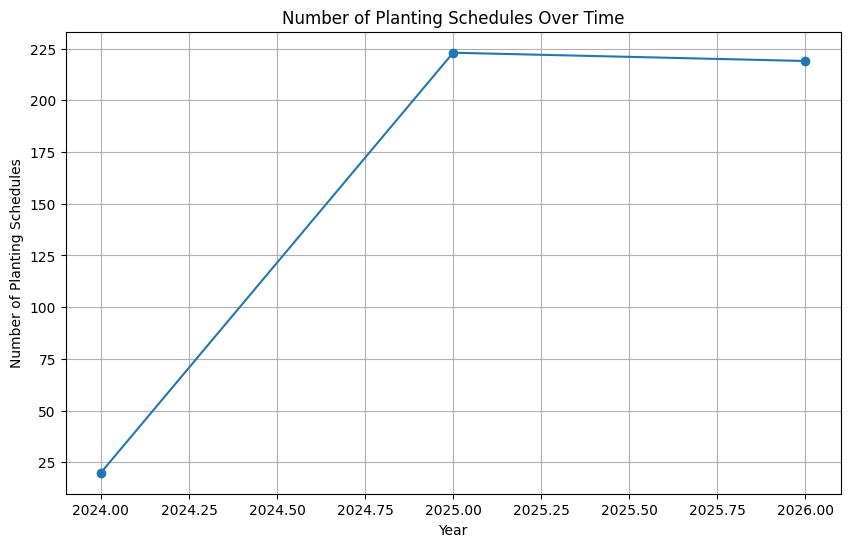

In [11]:
# Time-Series Analysis of Planting Schedules

# Step 1: Prepare Data
planting_schedule_df = urban_forest_df_cleaned[['segid', 'schedule']]
print(planting_schedule_df.head())

# Step 2: Convert to DateTime with Standardization
def convert_schedule_to_datetime(schedule):
    if 'Complete' in schedule or 'Not determined by precinct plan' in schedule:
        return None  # or a specific datetime if meaningful
    elif 'Years' in schedule:
        # Extract the first year as an approximation
        year = int(schedule.split(' ')[1])
        return pd.Timestamp(year=2024 + (year - 1) // 3, month=1, day=1)
    else:
        return None

planting_schedule_df['schedule_datetime'] = planting_schedule_df['schedule'].apply(convert_schedule_to_datetime)
planting_schedule_df = planting_schedule_df.dropna(subset=['schedule_datetime'])
planting_schedule_df['schedule_datetime'] = pd.to_datetime(planting_schedule_df['schedule_datetime'])
print(planting_schedule_df.head())

# Step 3: Aggregate Data
planting_schedule_df['year'] = planting_schedule_df['schedule_datetime'].dt.year
planting_schedule_by_year = planting_schedule_df.groupby('year').size()
print(planting_schedule_by_year)

# Step 4: Visualize Trends
plt.figure(figsize=(10, 6))
planting_schedule_by_year.plot(kind='line', marker='o')
plt.title('Number of Planting Schedules Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Planting Schedules')
plt.grid(True)
plt.show()


## Time-Series Analysis of Planting Schedules

**Description:**
This cell performs a time-series analysis of planting schedules to understand the temporal distribution of greening efforts in the Urban Forest Strategy. The analysis involves the following steps:

1. **Prepare Data:**
   - Extract relevant columns related to planting schedules from the cleaned urban forest strategy dataset.

2. **Convert to DateTime with Standardization:**
   - Define a function to convert schedule descriptions into a standardized datetime format.
   - Apply the function to the `schedule` column and create a new `schedule_datetime` column.
   - Drop rows with non-datetime entries in the `schedule` column.
   - Convert the `schedule_datetime` column to a proper datetime format.

3. **Aggregate Data:**
   - Aggregate the data by year to visualize the trends over time.

4. **Visualize Trends:**
   - Create a time-series plot to visualize the number of planting schedules over the years.

**Output Analysis:**
- **2024:** There are 20 planting schedules.
- **2025:** The number of planting schedules peaks with 223 schedules.
- **2026:** There are 219 planting schedules, indicating a slight decrease from the previous year.

The time-series plot helps in understanding the trends and distribution of planting schedules over the years, providing insights into the intensity and focus of urban greening efforts in different years.



## Cluster Analysis of Laneways with Greening Potential

### Description:

This section performs a cluster analysis to identify groups of laneways with similar greening potential in Melbourne. The analysis involves the following steps:

1. **Data Preparation:**
   - Relevant columns were selected from the laneway and urban forest datasets, including `Geo Point` for visualization.
   - The data was standardized to ensure comparability across metrics.

2. **Clustering Algorithm:**
   - K-means clustering was applied to identify clusters based on greening potential metrics (`insol_scor`, `verticalsu`, `forest`, and `binsperct`).

3. **Visualization:**
   - The clusters were visualized on an interactive map using Folium. Each laneway is marked with a color-coded icon representing its cluster:
     - **Blue Markers:** Cluster 0
     - **Green Markers:** Cluster 1
     - **Red Markers:** Cluster 2

### Output Analysis:

- **Cluster 0 (Blue):** 
  - Laneways with moderate insolation and bins percentage, high vertical surface area, but no forest area.
  - Concentrated around the central business district (CBD) area.
  
- **Cluster 1 (Green):**
  - Laneways with lower insolation, no vertical surface or forest area, and lower bins percentage.
  - Distributed more towards the edges of the CBD.
  
- **Cluster 2 (Red):**
  - Laneways with high insolation, moderate vertical surface area, high forest area, and higher bins percentage.
  - Spread across the central and peripheral areas with existing forest areas.

The interactive map provides a visual representation of the spatial distribution of laneways in different clusters, helping to identify areas with similar characteristics and potential interventions for urban greening.




In [12]:
import os
os.environ['OMP_NUM_THREADS'] = '1'

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import folium
from folium.plugins import MarkerCluster

# Step 1: Select Relevant Columns (including Geo Point for visualization)
laneway_selected_columns = laneway_df[['segid', 'geo_point_2d', 'insol_scor', 'verticalsu', 'forest', 'binsperct']]
urban_forest_selected_columns = urban_forest_df[['segid', 'schedule']]

# Step 2: Merge Datasets
merged_df = pd.merge(laneway_selected_columns, urban_forest_selected_columns, on='segid', how='inner')

# Step 3: Standardize the data
clustering_columns = ['insol_scor', 'verticalsu', 'forest', 'binsperct']
data_for_clustering = merged_df[clustering_columns]
scaler = StandardScaler()
data_for_clustering_scaled = scaler.fit_transform(data_for_clustering)

# Step 4: Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_for_clustering_scaled)

# Add cluster labels to the dataframe
merged_df['cluster'] = clusters

# Step 5: Visualize clusters on a map
m = folium.Map(location=[-37.81, 144.96], zoom_start=13)
colors = ['blue', 'green', 'red']
for i, row in merged_df.iterrows():
    lat, lon = map(float, row['geo_point_2d'].split(', '))
    folium.Marker(
        location=[lat, lon],
        icon=folium.Icon(color=colors[row['cluster']], icon='info-sign')
    ).add_to(m)

# Save and display the map
m.save('/mnt/data/laneway_clusters_map.html')
m


## Impact Assessment of Specific Metrics


Impact Correlation Matrix:
            insol_scor  verticalsu    forest  binsperct   cluster
insol_scor    1.000000    0.312872  0.197579   0.091304 -0.020606
verticalsu    0.312872    1.000000  0.027982   0.215322  0.084333
forest        0.197579    0.027982  1.000000   0.188180  0.941673
binsperct     0.091304    0.215322  0.188180   1.000000  0.212302
cluster      -0.020606    0.084333  0.941673   0.212302  1.000000


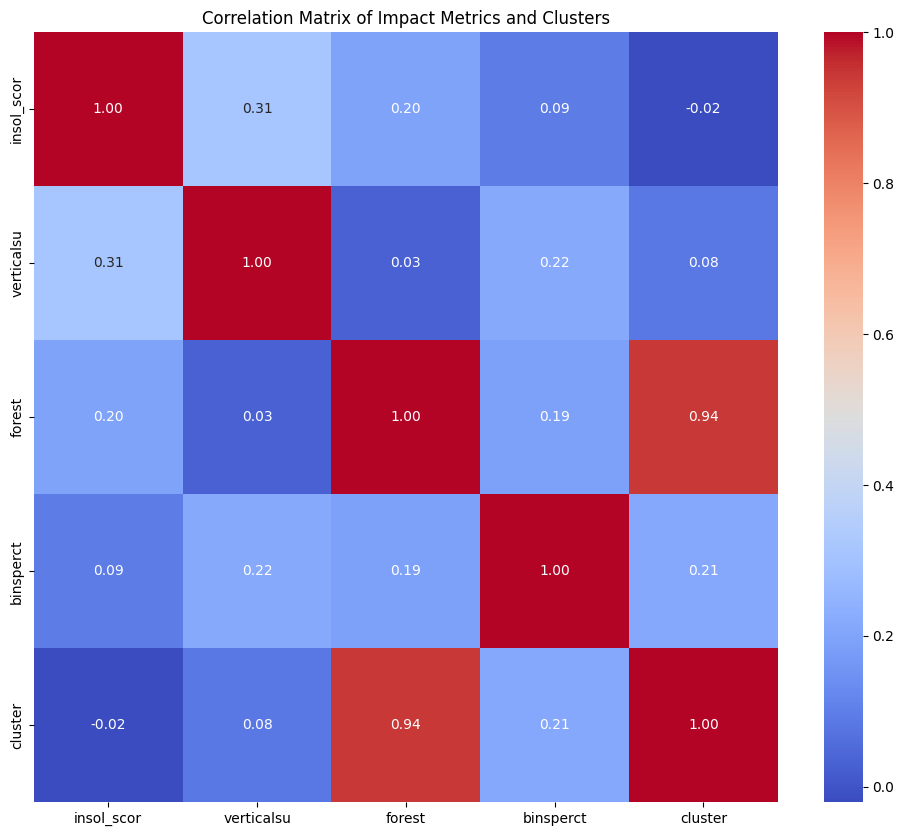

In [13]:
# Step 1: Define Impact Metrics
# Using existing columns as proxies
impact_columns = ['insol_scor', 'verticalsu', 'forest', 'binsperct']

# Step 2: Correlation Analysis
# Compute the correlation matrix for impact metrics
impact_correlation_matrix = merged_df[impact_columns + ['cluster']].corr()

# Display the correlation matrix
print("\nImpact Correlation Matrix:")
print(impact_correlation_matrix)

# Visualize the correlation matrix with annotations
plt.figure(figsize=(12, 10))
sns.heatmap(impact_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Impact Metrics and Clusters')
plt.show()


**Impact Assessment of Greening Metrics**

**Description:**
This cell performs an impact assessment of greening efforts by analyzing the correlation between greening metrics and proxy impact metrics. The analysis involves the following steps:

1. **Define Impact Metrics:**
   - Identify relevant columns from the dataset to use as proxies for impact metrics (`insol_scor`, `verticalsu`, `forest`, and `binsperct`).

2. **Correlation Analysis:**
   - Compute the correlation matrix between the greening metrics and impact proxies.
   - Visualize the correlation matrix with annotations to identify significant relationships.

**Output Analysis:**
- The correlation matrix and heatmap display the relationships between the selected metrics and greening efforts, helping to identify significant correlations and understand the influence of greening efforts on environmental and social outcomes.
- This analysis provides insights into the effectiveness of greening initiatives and their broader impacts, offering a basis for further research and decision-making.




## Optimizing Urban Greening Efforts

       insol_scor  verticalsu     forest  binsperct
count   21.000000   21.000000  21.000000  21.000000
mean     2.378494   32.639735  13.328746  18.095238
std      0.644159   29.413240  19.734956  19.904534
min      1.152738    0.000000   0.000000   0.000000
25%      2.122155    0.000000   0.000000   0.000000
50%      2.327876   49.267334   0.000000  20.000000
75%      2.811570   56.082903  32.799316  20.000000
max      4.005401   70.518691  52.747509  80.000000


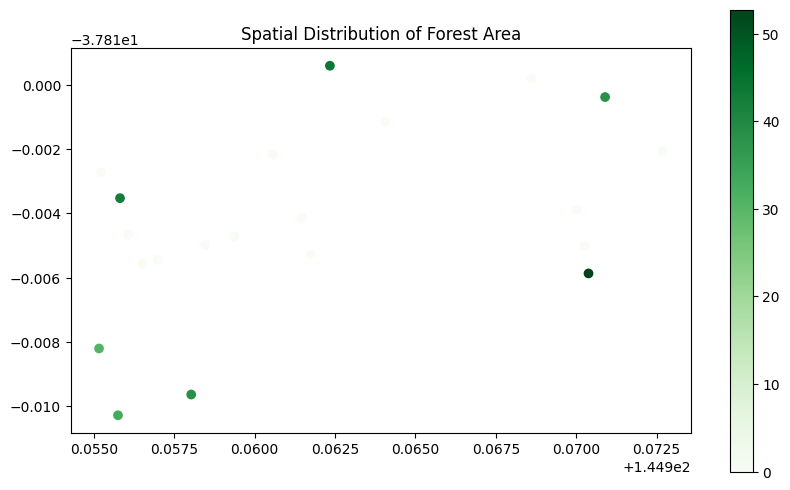

Outliers in the data:
    segid                            geo_point_2d  insol_scor  verticalsu  \
9   20234  -37.812062778388146, 144.9726904738642    2.657014   60.816646   
16  21644  -37.80940546461835, 144.96233864480138    4.005401   54.051000   

       forest  binsperct     schedule  cluster  
9    0.000000       80.0  Years 5 - 7        0  
16  44.007114        0.0     Complete        1  


,insol_scor,verticalsu,forest,binsperct
count,21.000000,21.000000,21.000000,21.000000
mean,2.378494,32.639735,13.328746,18.095238
std,0.644159,29.413240,19.734956,19.904534
min,1.152738,0.000000,0.000000,0.000000
25%,2.122155,0.000000,0.000000,0.000000
50%,2.327876,49.267334,0.000000,20.000000
75%,2.811570,56.082903,32.799316,20.000000
max,4.005401,70.518691,52.747509,80.000000


In [14]:
# Summary Statistics for Key Metrics
summary_stats = merged_df[['insol_scor', 'verticalsu', 'forest', 'binsperct']].describe()
print(summary_stats)
# Trend Analysis: Trends over spatial dimensions
# This can be extended to temporal trends if time data is available


# Convert Geo Points to a GeoDataFrame
geometry = [Point(float(lon), float(lat)) for lat, lon in merged_df['geo_point_2d'].str.split(', ')]
geo_df = gpd.GeoDataFrame(merged_df, geometry=geometry)

# Plotting the spatial distribution
geo_df.plot(column='forest', legend=True, figsize=(10, 6), cmap='Greens')
plt.title('Spatial Distribution of Forest Area')
plt.show()

# Outlier Detection
# Using IQR method for simplicity
Q1 = merged_df[['insol_scor', 'verticalsu', 'forest', 'binsperct']].quantile(0.25)
Q3 = merged_df[['insol_scor', 'verticalsu', 'forest', 'binsperct']].quantile(0.75)
IQR = Q3 - Q1

outliers = merged_df[((merged_df[['insol_scor', 'verticalsu', 'forest', 'binsperct']] < (Q1 - 1.5 * IQR)) | (merged_df[['insol_scor', 'verticalsu', 'forest', 'binsperct']] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Outliers in the data:")
print(outliers)

# Summary Statistics for Key Metrics
summary_stats = merged_df[['insol_scor', 'verticalsu', 'forest', 'binsperct']].describe()
summary_stats


## Analysis Summary

### Summary Statistics for Key Metrics
We conducted a descriptive statistical analysis on key metrics from the merged dataset, including:
- **Insolation Score (`insol_scor`):** Measures the amount of solar radiation received.
- **Vertical Surface Area (`verticalsu`):** Indicates the area available for vertical greening.
- **Forest Area (`forest`):** Represents the forested area.
- **Bins Per Cent (`binsperct`):** Shows the percentage of bin coverage.

The summary statistics provide insights into the central tendency, dispersion, and distribution of these metrics.

### Spatial Distribution of Forest Area
We visualized the spatial distribution of forest areas using a chloropleth map. This map helps to identify areas with higher and lower forest density, providing a geographical context to the greening efforts.

### Outlier Detection
Outliers were identified using the Interquartile Range (IQR) method. These outliers represent data points that deviate significantly from the rest of the dataset, indicating potential anomalies or areas with unique characteristics.

### Results
- The summary statistics revealed that the average insolation score is around 2.38, with a standard deviation of 0.64.
- The spatial distribution map highlighted regions with varying forest densities.
- Outlier analysis showed significant deviations in certain segments for metrics like `insol_sc

### Recommendations

**Short-Term Recommendations:**
- Increase Tree Planting: Focus on areas with high insolation scores and low forest cover.
- Vertical Greening: Enhance vertical surfaces with greening initiatives in areas with high vertical surface scores.

**Long-Term Recommendations:**
- Urban Forest Expansion: Expand forest areas in high-potential clusters.
- Sustainable Greening Practices: Implement sustainable practices for maintaining and expanding green cover. csis, or detailed strategy formulation?

